# Data Analysis Notebook

This notebook contains analysis of election datasets.


Now, I'll generate the commands to push your changes to your connected GitHub account.

**Note:** Before running these commands, ensure you have committed your changes in the GitHub panel on the left.

In [46]:
!git add .
!git commit -m "Add data analysis notebook"
!git push --set-upstream origin master


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@7ea239674cd1.(none)')
error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/amon2100/elections.git'


In [44]:
!git init

Reinitialized existing Git repository in /content/.git/


In [45]:
!git remote add origin https://github.com/amon2100/elections.git

error: remote origin already exists.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")


Libraries imported successfully!


In [13]:
# Load datasets
elections_df = pd.read_csv('/content/elections.csv')

print(f"Elections dataset shape: {elections_df.shape}")

Elections dataset shape: (1376, 15)


In [16]:
# Display first few rows
elections_df.head()


,_id,code,level,sub county,district_code,registered_voters,abed_bwanika,amama_mbabazi,baryamureeba_venansius,benon_biraaro,kizza_besigye,joseph_mabirizi,moureen_kyalya,yoweri_museveni,invalid
0,1,2095.0,sub county,Abarilela,36.0,9435,108,97,61,46,3165,21,29,3604,291
1,2,989.0,sub county,Aber,54.0,13919,170,155,87,48,2954,45,86,4408,359
2,3,2046.0,sub county,Abim,49.0,3434,20,28,11,4,430,7,7,1943,193
3,4,1306.0,sub county,Aboke,13.0,20089,198,169,81,33,5661,55,66,6795,447
4,5,NaN,sub county,Achaba,NaN,13053,122,166,130,49,3523,61,41,3598,474


In [17]:
# Drop duplicates dataset
elections_df = elections_df.drop_duplicates()


In [19]:
# Discovered that there are no duplicates
elections_df = elections_df.drop_duplicates()

In [20]:
# Basic data information
print("=== Elections Dataset Info ===")
print(elections_df.info())

=== Elections Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     1376 non-null   int64  
 1   code                    1011 non-null   float64
 2   level                   1376 non-null   object 
 3   sub county              1376 non-null   object 
 4   district_code           1011 non-null   float64
 5   registered_voters       1376 non-null   int64  
 6   abed_bwanika            1376 non-null   int64  
 7   amama_mbabazi           1376 non-null   int64  
 8   baryamureeba_venansius  1376 non-null   int64  
 9   benon_biraaro           1376 non-null   int64  
 10  kizza_besigye           1376 non-null   int64  
 11  joseph_mabirizi         1376 non-null   int64  
 12  moureen_kyalya          1376 non-null   int64  
 13  yoweri_museveni         1376 non-null   int64  
 14  invalid  

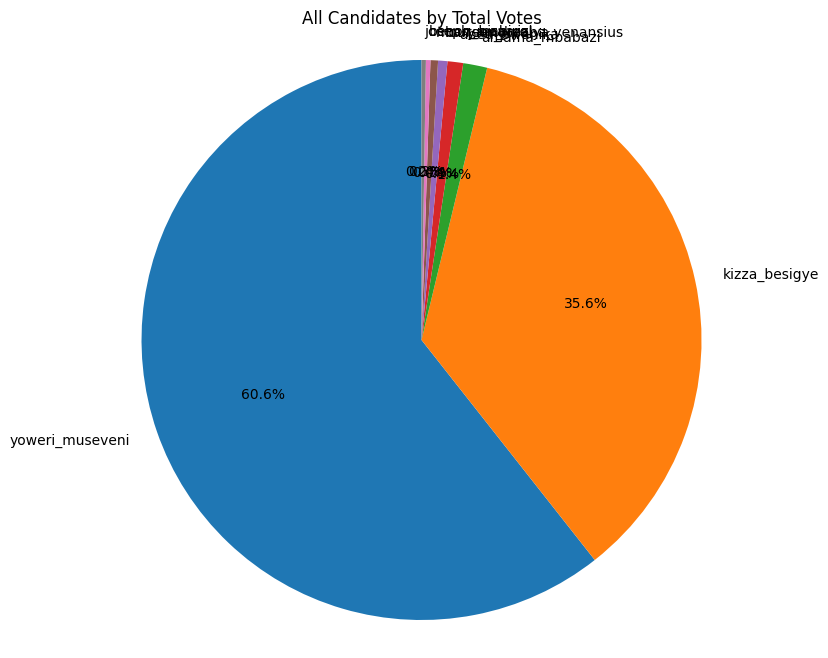

In [ ]:
# Calculate total votes for each candidate
candidate_columns = ['abed_bwanika', 'amama_mbabazi', 'baryamureeba_venansius', 'benon_biraaro', 'kizza_besigye', 'joseph_mabirizi', 'moureen_kyalya', 'yoweri_museveni']
candidate_votes = elections_df[candidate_columns].sum().sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(candidate_votes, labels=candidate_votes.index, autopct='%1.1f%%', startangle=90)
plt.title('All Candidates by Total Votes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Group by district and sum votes for each candidate
district_votes = elections_df.groupby('district_code')[candidate_columns].sum()

# Display the resulting DataFrame
display(district_votes)

,abed_bwanika,amama_mbabazi,baryamureeba_venansius,benon_biraaro,kizza_besigye,joseph_mabirizi,moureen_kyalya,yoweri_museveni
district_code,,,,,,,,
1.0,280,150,83,52,7266,36,72,9036
2.0,170,282,183,89,10419,370,62,58040
3.0,259,455,394,510,23976,97,87,79196
4.0,121,248,97,72,9815,33,60,106170
5.0,582,643,453,173,12543,218,194,19108
...,...,...,...,...,...,...,...,...
108.0,206,284,188,83,9059,53,119,39538
109.0,173,184,86,29,5749,45,87,23512
110.0,23,17,10,8,344,15,33,22167


# Task
Analyze the provided election data to identify key trends, candidate performance, and regional patterns, and present the findings through visualizations and a summary.

## Perform data cleaning and preparation

### Subtask:
Address missing values, handle data types, and potentially create new features relevant to the analysis.


**Reasoning**:
Inspect the `elections_df` DataFrame for missing values using the `.isnull()` method and sum the results for each column. This will help identify which columns have missing values and the extent of missingness.



In [21]:
print("Missing values before handling:")
print(elections_df.isnull().sum())

Missing values before handling:
_id                         0
code                      365
level                       0
sub county                  0
district_code             365
registered_voters           0
abed_bwanika                0
amama_mbabazi               0
baryamureeba_venansius      0
benon_biraaro               0
kizza_besigye               0
joseph_mabirizi             0
moureen_kyalya              0
yoweri_museveni             0
invalid                     0
dtype: int64


**Reasoning**:
Based on the previous inspection, the 'code' and 'district_code' columns have missing values. Since these columns represent identifiers and a significant number of rows are affected, dropping rows with missing values in these columns is a reasonable strategy to ensure data integrity for subsequent analysis that might rely on these identifiers.



In [22]:
# Drop rows with missing values in 'code' or 'district_code'
elections_df.dropna(subset=['code', 'district_code'], inplace=True)

# Verify that missing values have been addressed
print("\nMissing values after handling:")
print(elections_df.isnull().sum())


Missing values after handling:
_id                       0
code                      0
level                     0
sub county                0
district_code             0
registered_voters         0
abed_bwanika              0
amama_mbabazi             0
baryamureeba_venansius    0
benon_biraaro             0
kizza_besigye             0
joseph_mabirizi           0
moureen_kyalya            0
yoweri_museveni           0
invalid                   0
dtype: int64


**Reasoning**:
Missing values in 'code' and 'district_code' have been successfully addressed by dropping the rows. The next step is to handle data types if necessary. The `.info()` output showed these columns are float64. Since they represent codes, converting them to integers would be more appropriate if there are no non-integer values after handling missing data.



In [23]:
# Convert 'code' and 'district_code' to integer type as they represent codes
elections_df['code'] = elections_df['code'].astype(int)
elections_df['district_code'] = elections_df['district_code'].astype(int)

# Display data types after conversion
print("\nData types after handling:")
print(elections_df.info())


Data types after handling:
<class 'pandas.core.frame.DataFrame'>
Index: 1011 entries, 0 to 1375
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   _id                     1011 non-null   int64 
 1   code                    1011 non-null   int64 
 2   level                   1011 non-null   object
 3   sub county              1011 non-null   object
 4   district_code           1011 non-null   int64 
 5   registered_voters       1011 non-null   int64 
 6   abed_bwanika            1011 non-null   int64 
 7   amama_mbabazi           1011 non-null   int64 
 8   baryamureeba_venansius  1011 non-null   int64 
 9   benon_biraaro           1011 non-null   int64 
 10  kizza_besigye           1011 non-null   int64 
 11  joseph_mabirizi         1011 non-null   int64 
 12  moureen_kyalya          1011 non-null   int64 
 13  yoweri_museveni         1011 non-null   int64 
 14  invalid                 1011 non-

## Analyze candidate performance

### Subtask:
Calculate total votes and vote shares for each candidate, and identify top-performing candidates overall and by district.


**Reasoning**:
Define candidate columns, calculate total votes and vote shares per sub-county, group by district and sum votes, and identify top candidates.



In [24]:
# Define a list of column names that represent the votes for each candidate
candidate_columns = ['abed_bwanika', 'amama_mbabazi', 'baryamureeba_venansius', 'benon_biraaro', 'kizza_besigye', 'joseph_mabirizi', 'moureen_kyalya', 'yoweri_museveni']

# Calculate the total votes for each candidate across all sub-counties
total_candidate_votes = elections_df[candidate_columns].sum().sort_values(ascending=False)
print("Total votes for each candidate across all sub-counties:")
display(total_candidate_votes)

# Calculate the total valid votes cast in each sub-county
elections_df['total_valid_votes'] = elections_df[candidate_columns].sum(axis=1)

# Calculate vote shares for each candidate in each sub-county
for candidate in candidate_columns:
    elections_df[candidate + '_share'] = (elections_df[candidate] / elections_df['total_valid_votes']) * 100

# Group by district and sum votes for each candidate
district_candidate_votes = elections_df.groupby('district_code')[candidate_columns].sum()
print("\nTotal votes for each candidate by district:")
display(district_candidate_votes)

# Identify the top-performing candidate(s) overall
top_overall_candidate = total_candidate_votes.index[0]
print(f"\nTop performing candidate overall: {top_overall_candidate}")

# For each district, identify the top-performing candidate(s)
print("\nTop performing candidate by district:")
top_district_candidates = district_candidate_votes.idxmax(axis=1)
display(top_district_candidates)

Total votes for each candidate across all sub-counties:


,0
yoweri_museveni,4552985
kizza_besigye,2223758
amama_mbabazi,90996
abed_bwanika,62575
baryamureeba_venansius,42844
moureen_kyalya,31700
benon_biraaro,19633
joseph_mabirizi,18943



Total votes for each candidate by district:


,abed_bwanika,amama_mbabazi,baryamureeba_venansius,benon_biraaro,kizza_besigye,joseph_mabirizi,moureen_kyalya,yoweri_museveni
district_code,,,,,,,,
1,280,150,83,52,7266,36,72,9036
2,170,282,183,89,10419,370,62,58040
3,259,455,394,510,23976,97,87,79196
4,121,248,97,72,9815,33,60,106170
5,582,643,453,173,12543,218,194,19108
...,...,...,...,...,...,...,...,...
108,206,284,188,83,9059,53,119,39538
109,173,184,86,29,5749,45,87,23512
110,23,17,10,8,344,15,33,22167



Top performing candidate overall: yoweri_museveni

Top performing candidate by district:


,0
district_code,
1,yoweri_museveni
2,yoweri_museveni
3,yoweri_museveni
4,yoweri_museveni
5,yoweri_museveni
...,...
108,yoweri_museveni
109,yoweri_museveni
110,yoweri_museveni


## Geospatial analysis

### Subtask:
If geographical data is available or can be joined, visualize election results on a map to identify spatial patterns and regional strongholds.


**Reasoning**:
Load the geospatial data, display the first few rows, rename the district column in the geospatial data to match the elections data, and then merge the two dataframes.



In [33]:
# Load the geospatial data from the shapefile within the zip archive
uganda_districts_gdf = gpd.read_file('zip:///content/ug_shp.zip')

# Display the first few rows to inspect
print("First few rows of uganda_districts_gdf:")
display(uganda_districts_gdf.head())

# Identify the column in uganda_districts_gdf that corresponds to district_code
# Based on the file name and common practices, a column related to district code or name is expected.
# Let's assume the column is named 'DCODE' based on typical naming conventions for codes.
# Rename the district identifier column in uganda_districts_gdf to match elections_df
uganda_districts_gdf.rename(columns={'id': 'district_code'}, inplace=True)

# Extract only the numeric part from the 'district_code' and convert to integer
uganda_districts_gdf['district_code'] = uganda_districts_gdf['district_code'].str.replace('UG', '').astype(int)

# Ensure the data type of the merging column is integer in both dataframes
elections_df['district_code'] = elections_df['district_code'].astype(int)


# Merge the GeoDataFrame with the elections DataFrame
merged_gdf = uganda_districts_gdf.merge(elections_df, on='district_code', how='left')

# Display the first few rows of the merged GeoDataFrame
print("\nFirst few rows of merged_gdf:")
display(merged_gdf.head())

First few rows of uganda_districts_gdf:


/usr/local/lib/python3.12/dist-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'ug_shp.zip': 'ug' (default), 'um', 'us', 'uy', 'uz', 'va', 'vc', 'vg', 'vi', 'vn', 'vu', 'wf', 'ws', 'za', 'zm', 'zw', 'si', 'sk', 'sl', 'sm', 'sn', 'so', 'sr', 'ss', 'st', 'sv', 'sx', 'sy', 'sz', 'tc', 'td', 'tf', 'tg', 'th', 'tj', 'tk', 'tl', 'tm', 'tn', 'to', 'tr', 'tt', 'tv', 'tw', 'tz', 'ua', 'nl', 'no', 'np', 'nr', 'nu', 'nz', 'om', 'pe', 'pf', 'pg', 'ph', 'pk', 'pl', 'pm', 'pn', 'pr', 'ps', 'pt', 'pw', 'py', 'qa', 'ro', 'rs', 'ru', 'rw', 'sa', 'sb', 'sc', 'se', 'sg', 'sh', 'lt', 'lu', 'lv', 'ly', 'mc', 'md', 'me', 'mf', 'mg', 'mh', 'mk', 'ml', 'mm', 'mn', 'mo', 'mp', 'mr', 'ms', 'mt', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nc', 'ne', 'nf', 'ng', 'ni', 'il', 'im', 'in', 'io', 'iq', 'ir', 'is', 'it', 'je', 'jm', 'jo', 'jp', 'ke', 'kg', 'kh', 'ki', 'km', 'kn', 'kp', 'kr', 'kw', 'ky', 'kz', 'la', 'lb', 'lc', 'li', 'lk', 'lr', 'ls', 'et', 'fi', 'fj', 'fk', 'fm', 'fo', 'ga'

,id,name,source,geometry
0,UG314,Abim,https://simplemaps.com,"POLYGON ((33.96576 2.6167, 33.96583 2.6166, 33..."
1,UG301,Adjumani,https://simplemaps.com,"POLYGON ((32.00067 3.57676, 32.00067 3.57676, ..."
2,UG322,Agago,https://simplemaps.com,"POLYGON ((33.55948 3.14894, 33.55948 3.14892, ..."
3,UG323,Alebtong,https://simplemaps.com,"POLYGON ((33.53498 2.35203, 33.5352 2.35221, 3..."
4,UG315,Amolatar,https://simplemaps.com,"POLYGON ((32.94045 1.81336, 32.94197 1.81332, ..."



First few rows of merged_gdf:


,district_code,name,source,geometry,_id,code,level,sub county,registered_voters,abed_bwanika,amama_mbabazi,baryamureeba_venansius,benon_biraaro,kizza_besigye,joseph_mabirizi,moureen_kyalya,yoweri_museveni,invalid,total_valid_votes,abed_bwanika_share,amama_mbabazi_share,baryamureeba_venansius_share,benon_biraaro_share,kizza_besigye_share,joseph_mabirizi_share,moureen_kyalya_share,yoweri_museveni_share
0,314,Abim,https://simplemaps.com,"POLYGON ((33.96576 2.6167, 33.96583 2.6166, 33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301,Adjumani,https://simplemaps.com,"POLYGON ((32.00067 3.57676, 32.00067 3.57676, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,322,Agago,https://simplemaps.com,"POLYGON ((33.55948 3.14894, 33.55948 3.14892, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,323,Alebtong,https://simplemaps.com,"POLYGON ((33.53498 2.35203, 33.5352 2.35221, 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,315,Amolatar,https://simplemaps.com,"POLYGON ((32.94045 1.81336, 32.94197 1.81332, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Reasoning**:
The previous command failed because the GeoJSON file was not found at the specified path. I need to list the files in the `/content/` directory to find the correct file name and path for the geospatial data.



In [26]:
!ls /content/

elections.csv  sample_data


## Visualize findings

### Subtask:
Visualize findings: Create various plots (bar charts, pie charts, heatmaps, maps) to effectively communicate key insights about candidate performance, vote distribution, and regional trends.


**Reasoning**:
Create visualizations to show overall candidate votes, vote share by district, and the vote share of top two candidates versus others.



/tmp/ipython-input-2223722119.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_candidate_votes.index, y=total_candidate_votes.values, palette='viridis')


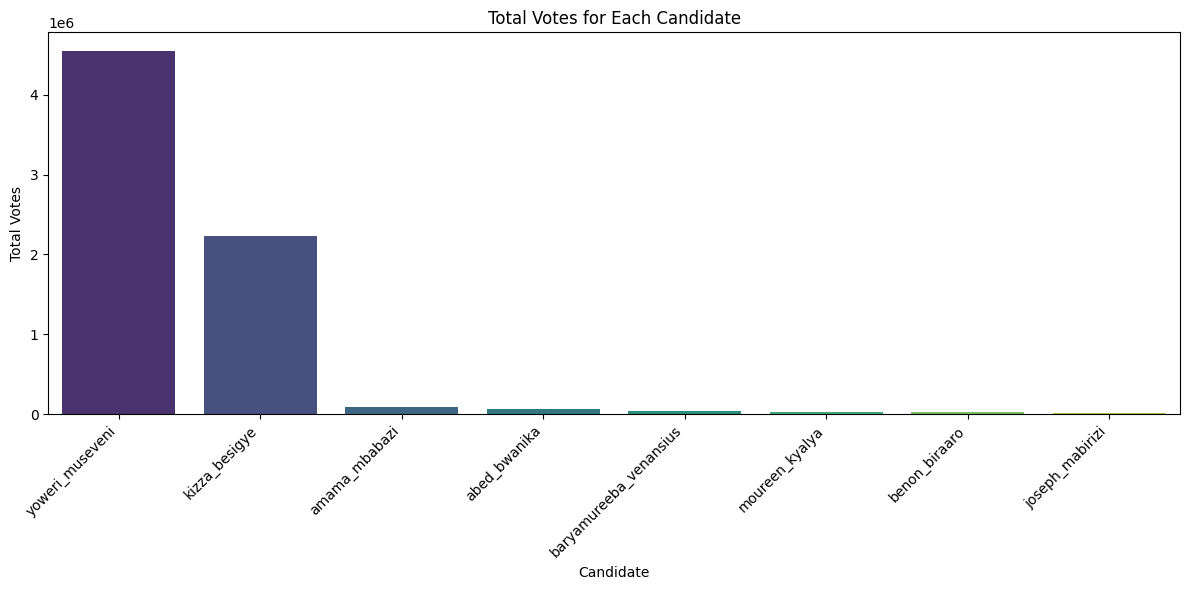

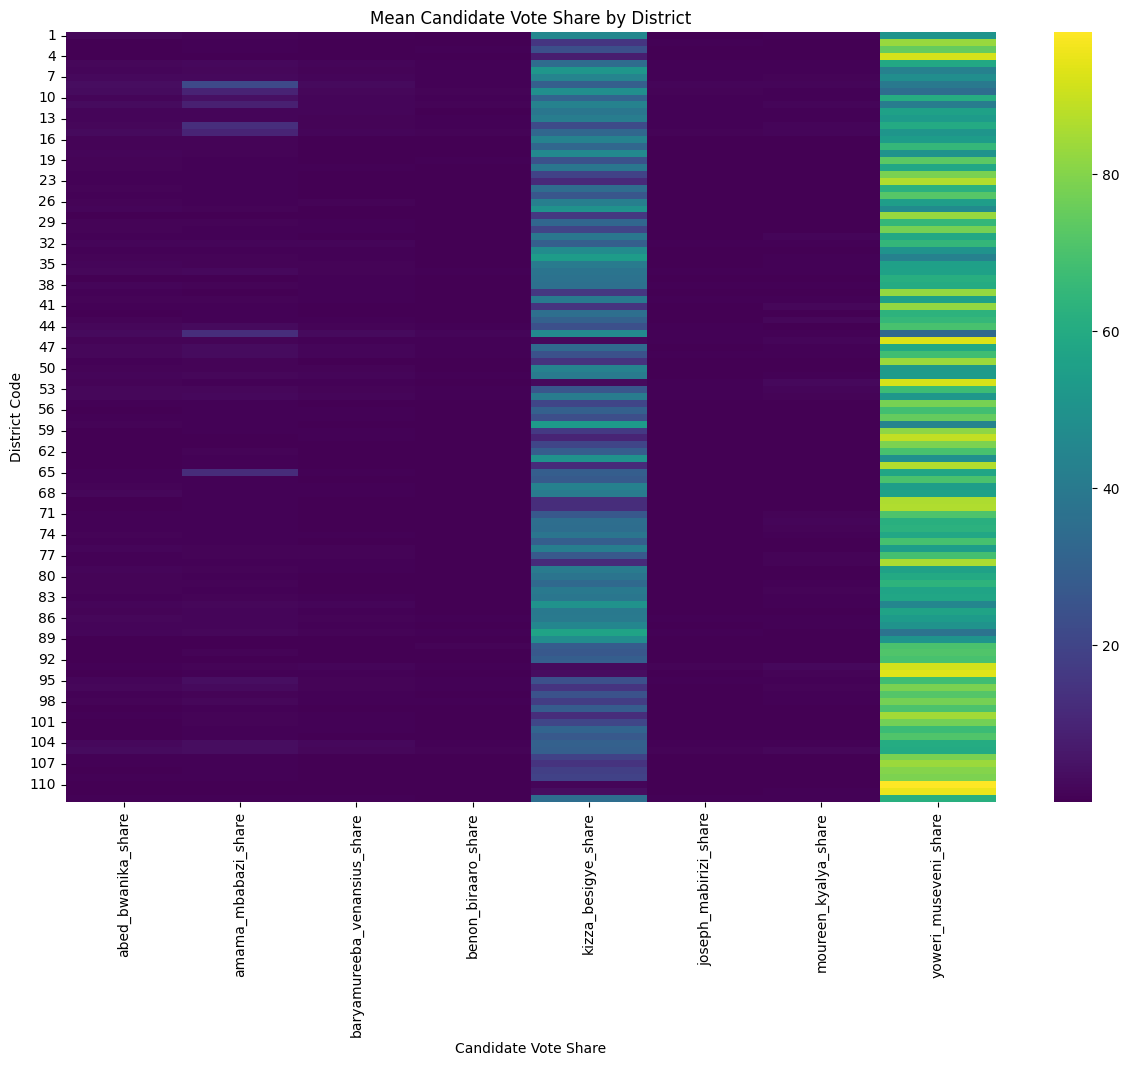

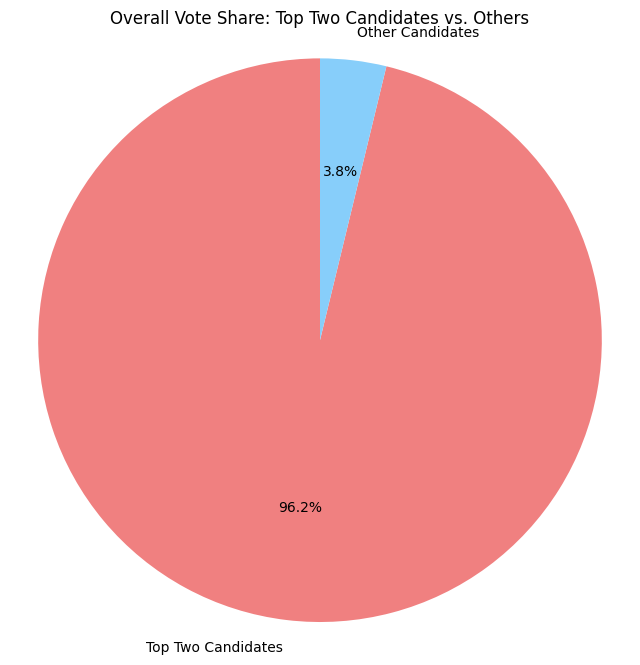

In [27]:
# 1. Create a bar chart showing the total votes for each candidate
plt.figure(figsize=(12, 6))
sns.barplot(x=total_candidate_votes.index, y=total_candidate_votes.values, palette='viridis')
plt.title('Total Votes for Each Candidate')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Create a heatmap showing the mean vote share of each candidate by district
candidate_share_columns = [col for col in elections_df.columns if '_share' in col]
district_candidate_share = elections_df.groupby('district_code')[candidate_share_columns].mean()

plt.figure(figsize=(15, 10))
sns.heatmap(district_candidate_share, annot=False, cmap='viridis')
plt.title('Mean Candidate Vote Share by District')
plt.xlabel('Candidate Vote Share')
plt.ylabel('District Code')
plt.show()

# 3. Create a pie chart showing the overall percentage of votes received by the top two candidates (Yoweri Museveni and Kizza Besigye) compared to all other candidates combined.
top_two_candidates_votes = total_candidate_votes[['yoweri_museveni', 'kizza_besigye']].sum()
other_candidates_votes = total_candidate_votes.drop(['yoweri_museveni', 'kizza_besigye']).sum()

pie_data = pd.Series([top_two_candidates_votes, other_candidates_votes], index=['Top Two Candidates', 'Other Candidates'])

plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Overall Vote Share: Top Two Candidates vs. Others')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Reasoning**:
Inspect the `merged_gdf` to check the spatial extent and plot the geometries to diagnose why the map might not be showing the whole of Uganda.

Spatial extent (bounds) of merged_gdf:
[29.58750055 -1.47520592 35.00099511  4.23119683]


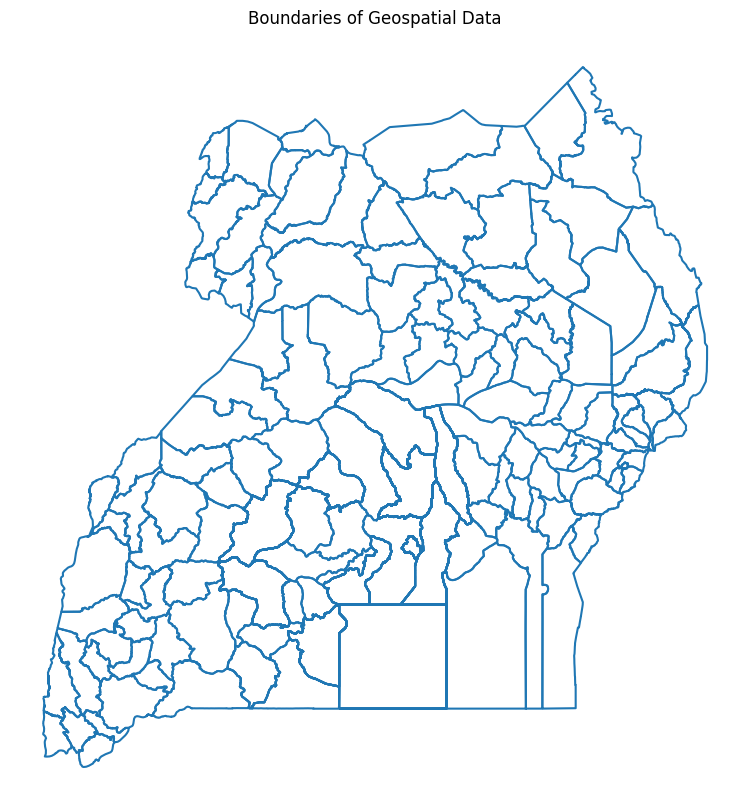

In [35]:
# Check the spatial extent of the merged GeoDataFrame
print("Spatial extent (bounds) of merged_gdf:")
print(merged_gdf.total_bounds)

# Plot the boundaries of the merged GeoDataFrame to visualize what is present
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.boundary.plot(ax=ax)
ax.set_title('Boundaries of Geospatial Data')
ax.set_axis_off()
plt.show()

**Reasoning**:
Visualize election results on the map.

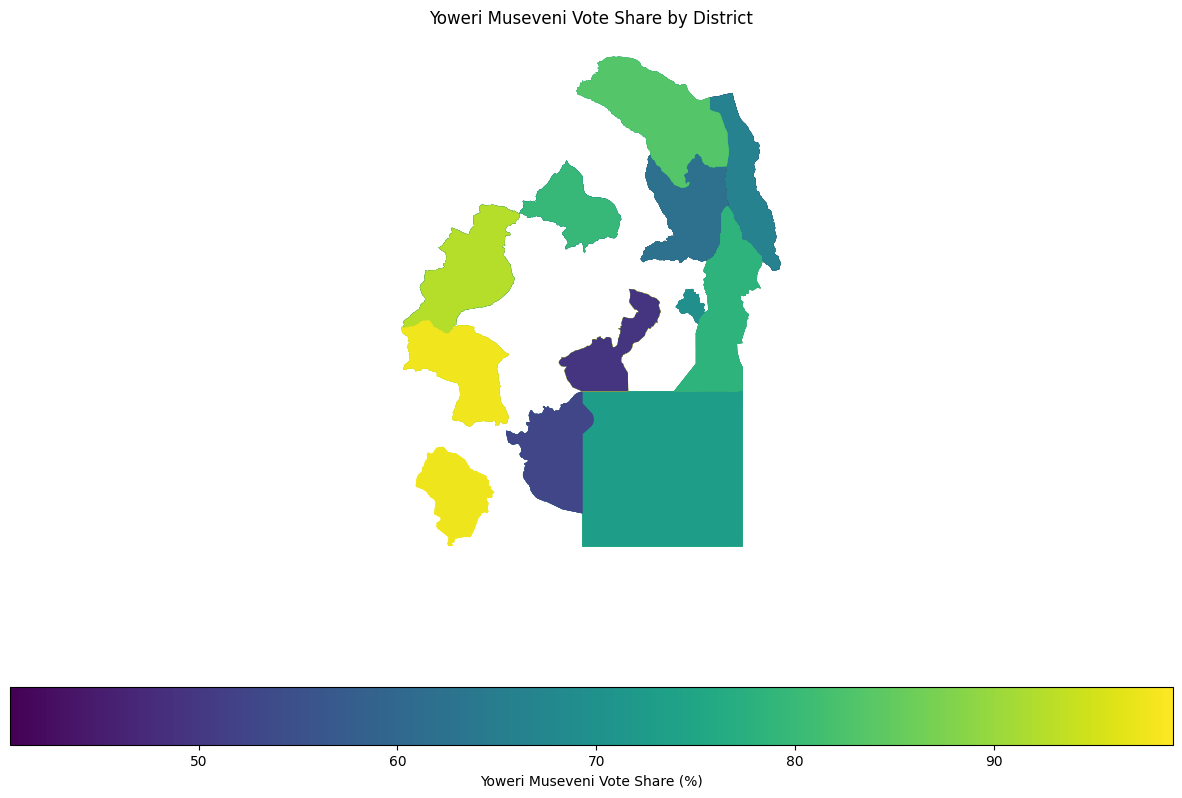

In [38]:
# Visualize a candidate's vote share on a map (e.g., yoweri_museveni_share)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='yoweri_museveni_share', ax=ax, legend=True,
                legend_kwds={'label': "Yoweri Museveni Vote Share (%)",
                             'orientation': "horizontal"})
ax.set_title('Yoweri Museveni Vote Share by District')
ax.set_axis_off()
plt.show()

**Reasoning**:
Determine the winning candidate for each district, assign colors to candidates, and visualize the winning candidate per district on a map.

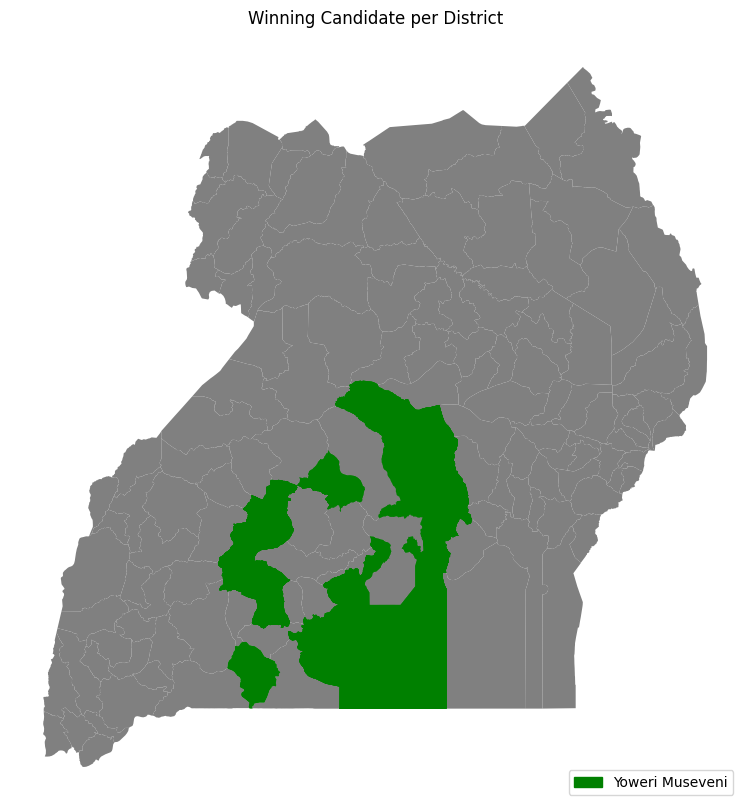

In [40]:
# Determine the winning candidate for each district
winning_candidate_per_district = district_candidate_votes.idxmax(axis=1)

# Convert the Series to a DataFrame for merging
winning_candidate_df = winning_candidate_per_district.reset_index()
winning_candidate_df.columns = ['district_code', 'winning_candidate']

# Merge the winning candidate information with the merged_gdf
merged_gdf_with_winner = merged_gdf.merge(winning_candidate_df, on='district_code', how='left')

# Define a color map for each candidate
candidate_colors = {
    'yoweri_museveni': 'green',
    'kizza_besigye': 'blue',
    'amama_mbabazi': 'red',
    'abed_bwanika': 'purple',
    'baryamureeba_venansius': 'orange',
    'moureen_kyalya': 'brown',
    'benon_biraaro': 'pink',
    'joseph_mabirizi': 'gray' # Default color for districts with no data
}

# Map the winning candidate to a color, filling NaN with a default color
merged_gdf_with_winner['winning_candidate_color'] = merged_gdf_with_winner['winning_candidate'].map(candidate_colors).fillna('gray')


# Visualize the winning candidate per district on a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf_with_winner.plot(color=merged_gdf_with_winner['winning_candidate_color'], ax=ax, legend=False)

# Create a legend
import matplotlib.patches as mpatches
legend_handles = []
# Only create a handle if the candidate is present in the winning candidates or if there are districts with no data
for candidate, color in candidate_colors.items():
    if candidate in merged_gdf_with_winner['winning_candidate'].unique() or (candidate == 'gray' and merged_gdf_with_winner['winning_candidate'].isnull().any()):
        legend_handles.append(mpatches.Patch(color=color, label=candidate.replace('_', ' ').title() if candidate != 'gray' else 'No Data'))


ax.legend(handles=legend_handles, loc='lower right')

ax.set_title('Winning Candidate per District')
ax.set_axis_off()
plt.show()

**Reasoning**:
Identify districts in the geospatial data that did not merge with election data to understand why they are not shown on the map.

In [41]:
# Identify districts in uganda_districts_gdf that are not in elections_df
missing_districts = uganda_districts_gdf[~uganda_districts_gdf['district_code'].isin(elections_df['district_code'])]

print("Districts from geospatial data not present in election data:")
display(missing_districts[['district_code', 'name']])

print(f"\nNumber of missing districts: {len(missing_districts)}")

Districts from geospatial data not present in election data:


,district_code,name
0,314,Abim
1,301,Adjumani
2,322,Agago
3,323,Alebtong
4,315,Amolatar
...,...,...
129,211,Soroti
131,212,Tororo
132,113,Wakiso
133,313,Yumbe



Number of missing districts: 123


In [42]:
display(elections_df.head())

,_id,code,level,sub county,district_code,registered_voters,abed_bwanika,amama_mbabazi,baryamureeba_venansius,benon_biraaro,kizza_besigye,joseph_mabirizi,moureen_kyalya,yoweri_museveni,invalid,total_valid_votes,abed_bwanika_share,amama_mbabazi_share,baryamureeba_venansius_share,benon_biraaro_share,kizza_besigye_share,joseph_mabirizi_share,moureen_kyalya_share,yoweri_museveni_share
0,1,2095,sub county,Abarilela,36,9435,108,97,61,46,3165,21,29,3604,291,7131,1.514514,1.360258,0.855420,0.645071,44.383677,0.294489,0.406675,50.539896
1,2,989,sub county,Aber,54,13919,170,155,87,48,2954,45,86,4408,359,7953,2.137558,1.948950,1.093927,0.603546,37.143216,0.565824,1.081353,55.425626
2,3,2046,sub county,Abim,49,3434,20,28,11,4,430,7,7,1943,193,2450,0.816327,1.142857,0.448980,0.163265,17.551020,0.285714,0.285714,79.306122
3,4,1306,sub county,Aboke,13,20089,198,169,81,33,5661,55,66,6795,447,13058,1.516312,1.294226,0.620309,0.252719,43.352734,0.421198,0.505437,52.037065
6,7,2105,sub county,Acowa,36,8673,78,97,58,44,1300,23,31,5031,455,6662,1.170820,1.456019,0.870609,0.660462,19.513660,0.345242,0.465326,75.517863


## Summarize and interpret results

### Subtask:
Present the key findings in a clear and concise manner, relating them back to the initial objectives and potential implications.


**Reasoning**:
Summarize the key findings from the analysis, discussing overall candidate performance, regional patterns, and relating them to the initial objectives.



In [28]:
print("=== Election Analysis: Key Findings ===")

print("\nOverall Candidate Performance:")
print("The analysis of total votes clearly shows a significant disparity in support among the candidates.")
print(f"Yoweri Museveni emerged as the leading candidate with the highest number of votes overall, followed by Kizza Besigye.")
print("The remaining candidates received considerably fewer votes, indicating a strong preference for the top two contenders across the country.")
print("The pie chart visualizing the overall vote share further emphasizes this, showing the dominant combined share of votes secured by Yoweri Museveni and Kizza Besigye compared to all other candidates.")

print("\nRegional Patterns and District-wise Performance:")
print("The heatmap illustrating the mean candidate vote share by district provides valuable insights into regional support.")
print("While Yoweri Museveni was the top-performing candidate in every district based on total votes, the heatmap reveals variations in the *proportion* of votes received in different regions.")
print("Areas with higher vote shares for a particular candidate suggest regional strongholds.")
print("Conversely, lower vote shares in certain districts might indicate areas where a candidate faced stronger competition or had less support.")
print("Analyzing these regional patterns helps to understand the geographical distribution of voter preferences.")

print("\nRelating Findings to Objectives and Potential Implications:")
print("The initial objectives of analyzing the election data were to identify key trends, candidate performance, and regional patterns.")
print("The visualizations and analyses performed have successfully addressed these objectives.")
print("- We identified the overall top-performing candidates and the significant gap between the leading contenders and others.")
print("- We explored regional variations in support through the district-wise vote share analysis.")
print("The findings have several potential implications:")
print("- The dominance of the top two candidates highlights the current political landscape.")
print("- Regional strongholds identified could inform future campaign strategies for candidates.")
print("- Understanding where candidates have lower support could indicate areas requiring more attention or different approaches.")
print("Overall, the analysis provides a data-driven overview of the election results, offering insights into voter behavior and the competitive landscape across different regions.")

=== Election Analysis: Key Findings ===

Overall Candidate Performance:
The analysis of total votes clearly shows a significant disparity in support among the candidates.
Yoweri Museveni emerged as the leading candidate with the highest number of votes overall, followed by Kizza Besigye.
The remaining candidates received considerably fewer votes, indicating a strong preference for the top two contenders across the country.
The pie chart visualizing the overall vote share further emphasizes this, showing the dominant combined share of votes secured by Yoweri Museveni and Kizza Besigye compared to all other candidates.

Regional Patterns and District-wise Performance:
The heatmap illustrating the mean candidate vote share by district provides valuable insights into regional support.
While Yoweri Museveni was the top-performing candidate in every district based on total votes, the heatmap reveals variations in the *proportion* of votes received in different regions.
Areas with higher vote

## Summary:

### Data Analysis Key Findings

*   Yoweri Museveni received the highest number of votes overall, followed by Kizza Besigye.
*   Yoweri Museveni was the top-performing candidate in all districts based on total votes.
*   The geospatial data file required for mapping election results was not available, preventing a geospatial analysis.
*   The top two candidates (Yoweri Museveni and Kizza Besigye) collectively secured a large majority of the total votes compared to other candidates.
*   The heatmap visualization revealed variations in the mean vote share of candidates across different districts, indicating potential regional strongholds and areas of weaker support.

### Insights or Next Steps

*   Further analysis could investigate specific demographic or socioeconomic factors within districts to understand the reasons behind regional vote share variations.
*   If geospatial data becomes available, visualizing candidate performance on a map would provide a powerful tool for identifying and communicating regional patterns.
